# Introduction to Machine Learning 
## Project: Finding Donors for *CharityML*

## Introduction

This is my first project of the Inro to Machine Learning with Tensorflow Nanodegree! 

In this project, I will employ several supervised algorithms of my choice to accurately model individuals' income using data collected from the 1994 U.S. Census. I will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. My goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. 

### Context
This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

### Python Version
Pyhon Version used in this notebook is: `Python 3.12.6`

### Dataset
The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. The article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `fnlwgt` feature and records with missing or ill-formatted entries.

**Featureset Exploration**

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Theory

### One-hot encoding 

It creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`:

|   | someFeature |                    
| :-: | :-: |                            
| 0 |  B  |  
| 1 |  C  |
| 2 |  A  |  

We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`:

|| someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: | :-: | :-: |
|0| 0 | 1 | 0 |
|1| 0 | 0 | 1 |
|2| 1 | 0 | 0 |


### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than $50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than $50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than $50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than $50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{\text{precision} \cdot \text{recall}}{\left( \beta^2 \cdot \text{precision} \right) + \text{recall}} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the $F_{0.5}$ score (or F-score for simplicity).

Looking at the distribution of classes (those who make at most $50,000, and those who make more), it's clear most individuals do not make more than $50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than $50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than $50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives (words classified as spam, and which are actually spam) to all positives (all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

$$\text{Precision} = \frac{\text{True Positives}} {\text{True Positives} + \text{False Positives}}$$

**Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives (words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

$$\text{Recall} = \frac{\text{True Positives}} {\text{True Positives} + \text{False Negatives}}$$

For classification problems that are skewed in their classification distributions, like in our case, for example, if we had 100 text messages and only 2 were spam and the remaining 98 weren't, accuracy is not a very good metric. We could classify 90 messages as not spam (including the 2 that were spam, but we classify them as not spam, hence they would be false negatives) and 10 as spam (all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score and the weighted average (harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean when dealing with ratios).

###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [scikit-learn](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- Stochastic Gradient Descent Classifier (SGDC)
- K-Nearest Neighbors (KNeighbors)
- Support Vector Machines (SVM)
- Logistic Regression

----
## Exploring the Data
The following code cell below load necessary Python libraries and load the census data. 

Note the last column from this dataset, `income`, will be the target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import train_test_split
from sklearn.model_selection import train_test_split
# Import two metrics from sklearn - fbeta_score and accuracy_score, 'make_scorer'
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer

# Import 'GridSearchCV'
from sklearn.model_selection import GridSearchCV

# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# Import the three supervised learning models from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Import functionality for cloning a model
from sklearn.base import clone

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [5]:
# Load the Census dataset
df = pd.read_csv("data/census.csv")

# Success - Display the first record
display(df.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


> In this dataset we have 14 features with diffrent datatypes. They are all complete regarding the non-null counts. 

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than $50,000. 

- The total number of records, `n_records`

In [7]:
# Total number of records
n_records = df.shape[0]
print("Total number of records: {}".format(n_records))

Total number of records: 45222


- The number of individuals making more than $50,000 annually, `n_greater_50k`.


In [8]:
df['income'].unique() ## looking into the values on income

array(['<=50K', '>50K'], dtype=object)

In [9]:
# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['income'] == ">50K"]['age'].count() ## the count of any column in this filtering is the same so I chose the age to count
print("Individuals making more than $50,000: {}".format(n_greater_50k))

Individuals making more than $50,000: 11208


- The number of individuals making at most $50,000 annually, `n_at_most_50k`.


In [10]:
# Number of records where individual's income is at most $50,000
n_at_most_50k = df[df['income'] == "<=50K"]['age'].count() ## the count of any column in this filtering is the same so I chose the age to count
print("Individuals making at most $50,000: {}".format(n_at_most_50k))

Individuals making at most $50,000: 34014


- The percentage of individuals making more than $50,000 annually, `greater_percent`.


In [11]:
# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records) * 100
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Percentage of individuals making more than $50,000: 24.78439697492371%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: `capital-gain` and `capital-loss`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

/Users/waadalkatheri/Desktop/Finding-Charity-Donors-main/visuals.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


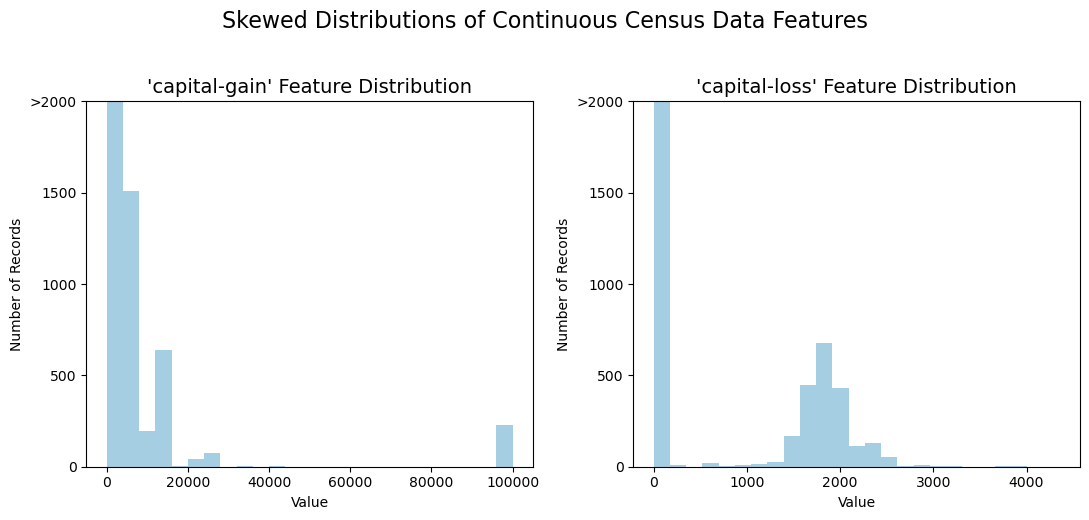

In [10]:
# Split the data into features and target label
Y = df['income'] ## I renamed the target feature as convention that is Y
X = df.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(df)
plt.show();

For highly-skewed feature distributions such as `capital-gain` and `capital-loss`, it is common practice to apply a [logarithmic transformation](https://en.wikipedia.org/wiki/Data_transformation_(statistics)) on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

In [11]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = X)
features_log_transformed[skewed] = X[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

/Users/waadalkatheri/Desktop/Finding-Charity-Donors-main/visuals.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `capital-gain` or `capital-loss` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [12]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. 

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `income` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as 0 and 1, respectively. 

In [13]:
def encode_income(value):
    """
    Encoding the income feature to numerical, Set records with "<=50K" to 0 and records with ">50K" to 1.
    Args:
        value (str) either "<=50K" or "<=50K"
    Returns:
        0 if value is "<=50K" or 1 if value is ">50K"
    """
    if value == "<=50K":
        return 0
    else:
        return 1

In [14]:
# Encode the 'income_raw' data to numerical values
Y_encoded = Y.apply(encode_income)

Y_encoded.sample(10) ## to ensure accurate encoding

3277     1
19918    0
22366    0
1418     0
1278     0
3373     1
30732    0
11647    0
7835     0
38855    0
Name: income, dtype: int64

In [15]:
# Performing One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
X_encoded = pd.get_dummies(features_log_minmax_transform) 

# Print the number of features after one-hot encoding
encoded = list(X_encoded.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [15]:
X_encoded.sample(10) ## to ensure accurate encoding let's take a look 

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
22221,0.301370,0.533333,0.0,0.000000,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
12170,0.205479,0.533333,0.0,0.000000,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2048,0.342466,0.733333,0.0,0.000000,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
17615,0.054795,0.333333,0.0,0.000000,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
28535,0.219178,0.600000,0.0,0.000000,0.244898,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
837,0.136986,0.533333,0.0,0.000000,0.295918,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
29007,0.342466,0.533333,0.0,0.000000,0.438776,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4612,0.342466,0.933333,0.0,0.905759,0.500000,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
34694,0.136986,0.533333,0.0,0.000000,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
39437,0.095890,0.533333,0.0,0.000000,0.448980,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [16]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size = 0.2, random_state = 42)

In [17]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners:

- `clf_A = KNeighborsClassifier()` K neighbors.
- `clf_B = SVC()` Suppportive vector
- `clf_C = LogisticRegression()` Logestic Regression

and the fourth algorithm is known as a *naive predictor*.

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? 

In [18]:
TP = np.sum(Y_encoded) # Counting the ones as this is the naive case. Note that 'Y_encoded' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = Y_encoded.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

In [19]:
# Calculating accuracy, precision and recall
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall =  TP / (TP + FN)
precision =  TP / (TP + FP)

In [20]:
# Calculating F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5 
beta_sqr = np.square(beta)
f_score = (1 + beta_sqr) * ((precision * recall) / ((beta_sqr * precision) + recall))

In [21]:
# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, f_score))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


> **Answer:**



The naive predictor is a simple baseline model that always predicts a single outcome without considering the data. In this case, the naive predictor assumes that every individual earns more than $50K. Based on the calculations, the accuracy of this model is 0.2478, meaning it is correct only 24.78% of the time. The F-score, which balances precision and recall with a beta of 0.5, is calculated as 0.2917.

- When the model always predicts "1" (i.e., the individual earns more than $50K), there are no True Negatives (TN) or False Negatives (FN) because the model does not make any negative predictions (0 values). As a result, the accuracy in this scenario is equivalent to the precision, calculated as True Positives divided by the total number of predictions (True Positives + False Positives). Every incorrect prediction of "1" where the true label is "0" becomes a False Positive, making the denominator equal to the total number of samples. Recall, on the other hand, is 1.0 because there are no False Negatives, meaning all positive cases in the data are captured by the predictions.

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

> **Answer:**

The three supervised learning models used are:

- **K-Nearest Neighbors**
- Real-World Applications:

- Enhances investment decisions in finance.
- Detects diseases early in healthcare.
- Improves sales and user satisfaction in e-commerce.
- Strengthens security and automation in computer vision.
- Strengths:

- Simple to implement and computationally fast.
- Adapts easily to new data and generalizes well.
- Requires fewer hyperparameters compared to other algorithms.
- Weaknesses:

- Struggles with high-dimensional data due to the curse of dimensionality.
- Prone to overfitting if the value of k is not chosen carefully.
- Reason for Choosing:
- KNN is effective for classification tasks involving similarity-based decisions. Since this problem involves predicting potential donors, KNN can leverage the similarities in data to make accurate predictions. Its adaptability to new data makes it suitable for this task.

- **Support vector Machine**
- Real-World Applications:

- Face detection by classifying face vs. non-face regions.
- Document categorization in text and hypertext.
- Gene classification and cancer detection in bioinformatics.
- Widely used for handwriting recognition.
- Strengths:

- Works well when there is a clear margin of separation between classes.
- Effective in high-dimensional spaces.
-Performs well when the number of features exceeds the number of samples.
- Memory-efficient.
- Weaknesses:

- Not suitable for very large datasets.
- Performs poorly with noisy data or overlapping classes.
- May underfit when the number of features far exceeds the training samples.
- Reason for Choosing:
- The dataset, after preprocessing and encoding, is high-dimensional. SVM is ideal for binary classification tasks in such scenarios as it constructs decision boundaries to separate potential donors effectively.

- **Logistic Regression**
- Real-World Applications:

- Used in credit scoring with remarkable results.
- Identifies relationships between micro-RNA and genes in medicine.
- Processes and formats text data in text editors.
- Predicts user behavior, such as changes in journey dates, in the travel industry.
- Strengths:

- Provides outputs with probabilistic interpretation.
- Regularization techniques prevent overfitting.
- Easily updated with new data using stochastic gradient descent.
- Weaknesses:

- Underperforms with multiple or non-linear decision boundaries.
- Not flexible enough to naturally capture complex relationships.
- Reason for Choosing:
Logistic Regression works well for binary classification problems. It is simple, interpretable, and less prone to overfitting, making it an efficient choice for separating the data and predicting donor behavior.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model I've chosen, it's important that we create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. 

In [22]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
   """
   Trains a model and predicts to return the results of performance metrics.
   Args:
      - learner: the learning algorithm to be trained and predicted on
      - sample_size: the size of samples (number) to be drawn from training set
      - X_train: features training set
      - y_train: income training set
      - X_test: features testing set
      - y_test: income testing set

   Returns:
      results (set)
   """
   results = {}

   # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
   train_start = time() # Get start time
   learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
   train_end = time() # Get end time

   # Get the predictions on the test set(X_test), then get predictions on the first 300 training samples(X_train) using .predict()
   pred_start = time() # Get start time
   predictions_test = learner.predict(X_test)
   predictions_train = learner.predict(X_train[:300])
   pred_end = time() # Get end time

   results['train_time'] = train_end -  train_start # Calculate the training time
   results['pred_time'] = pred_end - pred_start   # Calculate the total prediction time
   results['acc_train'] = accuracy_score(y_train[:300], predictions_train) # Compute accuracy on the first 300 training samples which is y_train[:300]
   results['acc_test'] = accuracy_score(y_test, predictions_test) # Compute accuracy on test set using accuracy_score()
   results['f_train'] = fbeta_score(y_train[:300], predictions_train,  beta = 0.5)    # Compute F-score on the the first 300 training samples using fbeta_score()
   results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5) # Compute F-score on the test set which is y_test

   # Success
   print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

   return results  # Return the results

### Implementation: Initial Model Evaluation
In this section, the default settings for each model are used, then one specific model is tuned in a later section.

In [23]:
# Initialize the three models

clf_A = KNeighborsClassifier()
clf_B = SVC(random_state=42)
clf_C = LogisticRegression(random_state=42)

In [24]:
# Calculating the number of samples for 1%, 10%, and 100% of the training data, samples_1 is 1% of samples_100 ( the count of the values is set to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100) 

In [25]:
# Collect results on the learners
results = {}

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


/Users/aqlamaai/Documents/Finding-Charity-Donors/visuals.py:122: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  pl.tight_layout()


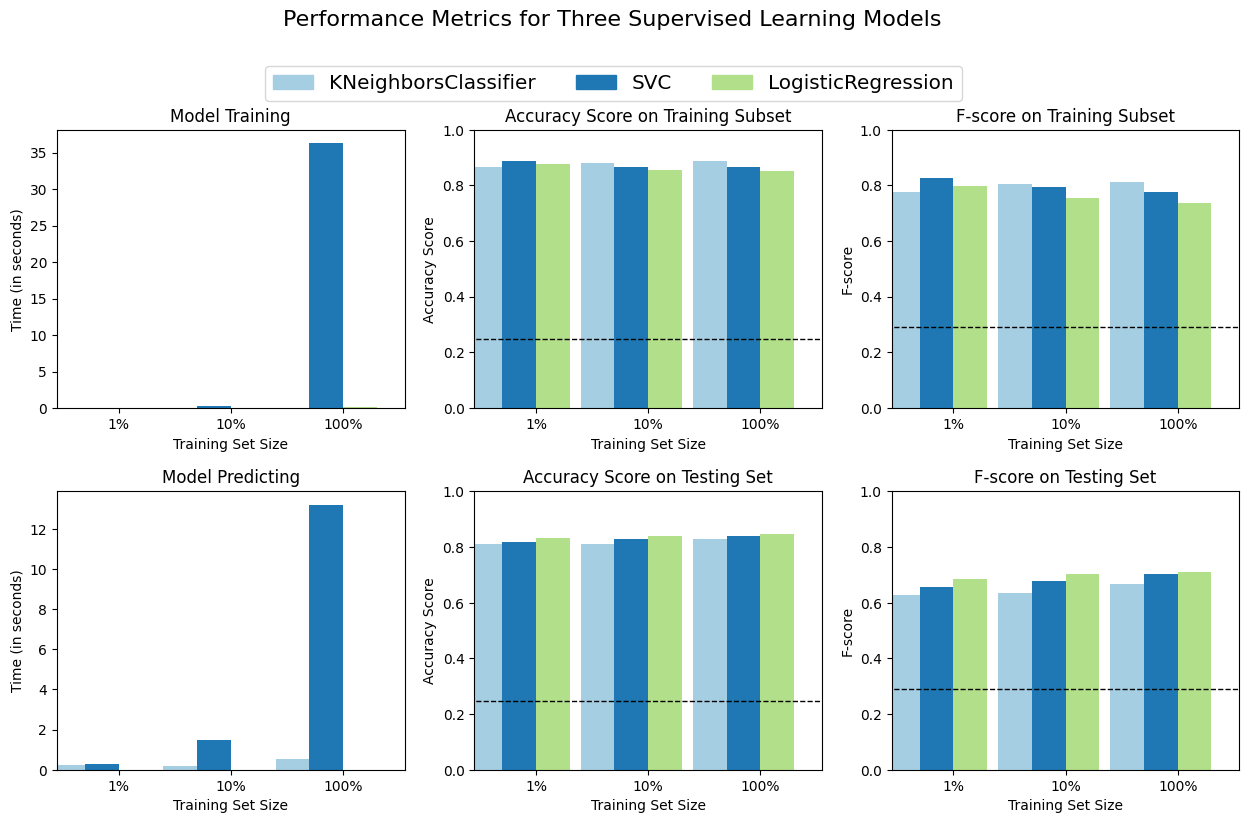

In [26]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, f_score)

**interpretations on performance:** 

> Model training time:
- SVC takes the longer time to train, specialy when the training set is all used 100%. that seems to be computationally expensive.
- The KNN and the LR take much less time in training overall samples (1%, 10%, 100%)

> Accuracy Score on training:
- All the algorthims acheive a high training accuracy on all subsets. LR seems to have almost the same accuracies on all subestes. The highest accuracy scored when the KNN model is trained on 100% of the training set. 
- SVC performs the same on all training subsets.

> F-score on training:
- they seem to score similarly high across all training subsets. That means there is a good balance between percision and recall training.

> Model Prediction Times:
- SVM is the sloweset in making predictions, with the it's increasing hugely when the whole training set is used as it reaches almost 14 seconds.
- KNN time to predict also slightly increases when the training subset increases.
- As for the logestic regresion, is is the fastest in prediction time, alsmost no time in comparisio to the other two algorthims.

> Accuracy score on testing:
- Models have almost the same performance, within each subset of the training samples. and within the same range of training. 
- That is the models are genralizing well on the unseen data, non of the algorthims have the overfitting issue.
- The highest score on testing accuracy is the SVC model.

> F-score on testing:
- This scores drops from 0.8 to 0.6 for all models.

----
## Improving Results
In this final section, I will choose from the three supervised learning models the *best* model to use on the data. then I perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation performed earlier,here is an explaination to *CharityML* which of the three models I believe to be most appropriate for the task of identifying individuals that make more than $50,000. 

> **Answer:**

Based on the graph above, the model with the highest F-score on the testing set, when using 100% of the training data, is the SVC model.

* The SVC model demonstrates the best balance between precision and recall, achieving the highest F-score on the testing set.
* However, while the SVC model excels in F-score and accuracy, it also has the highest prediction and training times, making it computationally expensive.
* Considering the algorithm's suitability for the data, the high computational cost makes SVC less practical for this task.
* This scenario presents a trade-off between optimal performance and computational efficiency. Given this trade-off, the Logistic Regression (LR) model is a more suitable choice. While its F-score and accuracy are slightly lower than the SVC, it is computationally efficient and better aligned with the practical needs of CharityML.

### Question 4 - Describing the Model in Layman's Terms

* Here is a paragraph to explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. 

**Answer:** 

The Logistic Regression (LR) model is chosen for this task because it is straightforward and effective in predicting the outcome. The model learns to identify patterns in the data by analyzing the various features and their relationship to the target variable. Based on this, it can evaluate new data and predict whether a person is likely to donate.

The model works by assigning weights to each feature and combining them into a single value. If this value exceeds a certain threshold, the prediction will be that the person earns more than $50K; otherwise, the prediction will be that their income is less than $50K. Its simplicity and speed make it a practical and reliable solution for this problem.








### Implementation: Model Tuning
In this section we Fine tune the LR model. Using grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. Using the entire training set for this. 

In [24]:
# Initialize the classifier
clf = LogisticRegression()

In [25]:
# Creating the parameters list to tune, using a dictionary 
## C is the regularization strength
## penalty is the regularization type
## solver has to match the penalty
## max_iter is set because I got a  ConvergenceWarning: The max_iter was reached which means the coef_ did not converge

parameters = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

In [26]:
# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

In [27]:
## Performing grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator= clf, param_grid= parameters, scoring= scorer, cv = 5)

## Fiting the grid search object to the training data to find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

## Geting the estimator
best_clf = grid_fit.best_estimator_

In [28]:
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

In [30]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8456
F-score on testing data: 0.7103

Optimized Model
------
Final accuracy score on the testing data: 0.8449
Final F-score on the testing data: 0.7092


### Question 5 - Final Model Evaluation

The table below shows the results of the optimzation done on the LR model.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8456       |       0.8449    |
| F-score        |      0.7103     |    0.7092      |


**Answer:**

When comparing the optimized model to the unoptimized one, there are only minor differences in performance. The optimized model shows a slight improvement in both accuracy and F-score, though the gains are minimal.

However, when comparing the optimized model to the naive predictor, the difference is significant. The naive predictor achieves an accuracy of only 0.2478, whereas the optimized model reaches an accuracy of 0.8449. Similarly, the F-score of the optimized model is considerably higher, demonstrating its superior performance over the naive baseline.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. 

In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than $50,000.

A scikit-learn classifier that is random forests has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  

I fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.

Of these thirteen records, let's determine which five features do you believe to be most important for prediction, and in what order would I rank them and why?

In [33]:
df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

**Answer:**

Based on the important features, I would select the following five as the most significant for prediction, listed in order of relevance, along with their reasoning:

- `occupation`: Individuals in higher-level or specialized roles within a company typically earn higher incomes.
- `workclass`: The type of employment or sector often influences earning potential significantly.
- `marital-status`: Married individuals may have different spending patterns, potentially impacting disposable income levels.
- `hours-per-week`: The number of hours worked directly contributes to the total annual income, with more hours generally leading to higher earnings.
- `education_level`: Higher levels of education are often associated with better-paying jobs and increased earning capacity.

### Implementation - Extracting Feature Importance
A `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it would be the RandomForest classifier. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

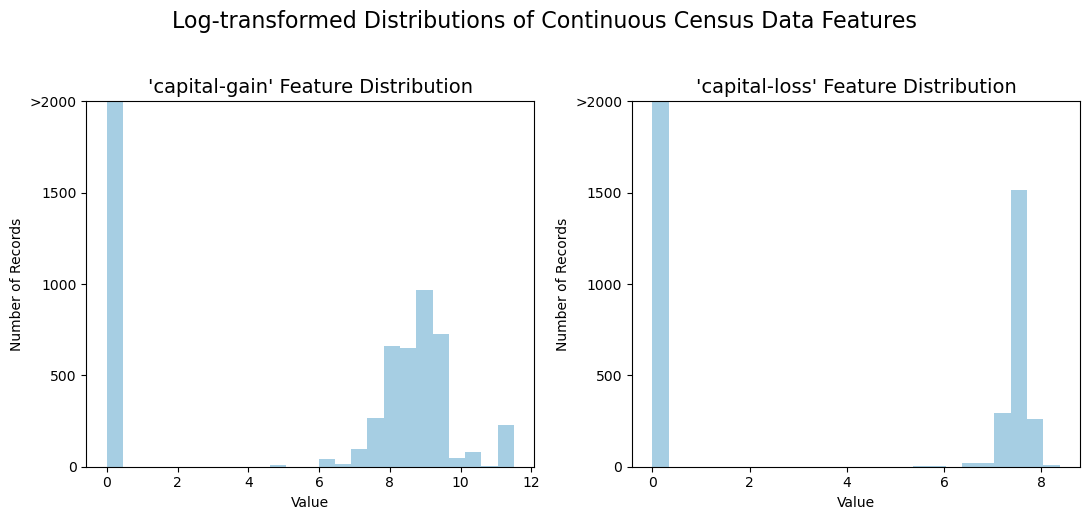

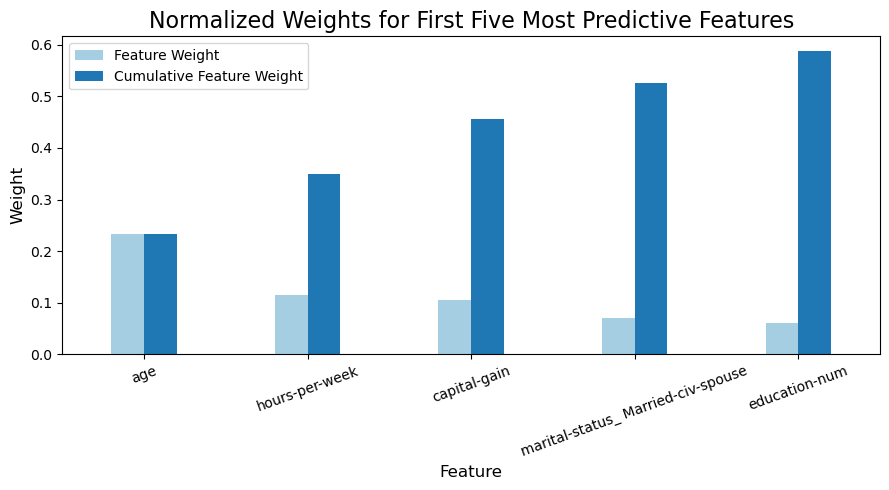

In [31]:
## Training the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier()
model = model.fit(X_train, y_train)

## Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

> Interprestions:

- Education_num feature: has the highest weight overall features. with 0.6 contribution.
- Martial- status: comes a secnd weight with 0.6 weight.
- Capital-gain: between 0.5 and 0.4.
- Hours-per week: between 0.3 and 0.4
- then finally comes the age where it has a contribution of wight between 0.2 and 0.3/

### Question 7 - Extracting Feature Importance

Observing the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above $50,000.  Let's discuss how my answer compares to the actual important features.

> **Answer:**

- My selection closely matched the actual feature importance, with a few differences. Specifically, occupation and workclass did not carry as much weight as I initially anticipated.

- The predictions for marital status and hours-per-week were accurate, as their significance was confirmed by the visualization. Marital status has a weight of 0.5 or higher, and hours-per-week contributes significantly with weights of 0.3 or more.

- Interestingly, education level did not appear as an important feature in the visualization. Instead, education num emerged as the most influential feature overall, reinforcing the idea that education plays a critical role in determining income.


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. 

From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. 

Let's use the same optimized model found earlier, and train it on the same training set *with only the top five important features*. 

In [32]:
# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

In [33]:
# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8449
F-score on testing data: 0.7092

Final Model trained on reduced data
------
Accuracy on testing data: 0.8284
F-score on testing data: 0.6731


> Results:

| Metric  | Final Model (Full Data) | Final Model (Reduced Data) |
|------------|-----------------------|--------------------------|
| **Accuracy**  =    | 0.8449         | 0.8284    |
| **F-score**       | 0.7092        | 0.6731      |

### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

> **Answer:**

- The final model trained on the complete dataset (using all features) achieves slightly better performance, with an accuracy of 0.8449 compared to 0.8284 and an F-score of 0.7092 compared to 0.6731, when compared to the model trained on the reduced dataset with only five features.

- If training time were a significant consideration, I would opt for the reduced dataset. While it results in a small decrease in accuracy and F-score, using fewer features would require less computational power and resources, making it a more efficient choice in resource-constrained scenarios.